#### Imports

Step 1: Reading the Data
Step 2: Cleaning the Data
Step 3: Feature Extraction
Step 4: Exploratory Analysis
Step 5: Plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Now that I've got my modules imported for our EDA, let's load the csv data into Pandas!

In [5]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.shape

(891, 12)

## Moving on to Step 2: Cleaning the Data

Let's investigate null values and graph it

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

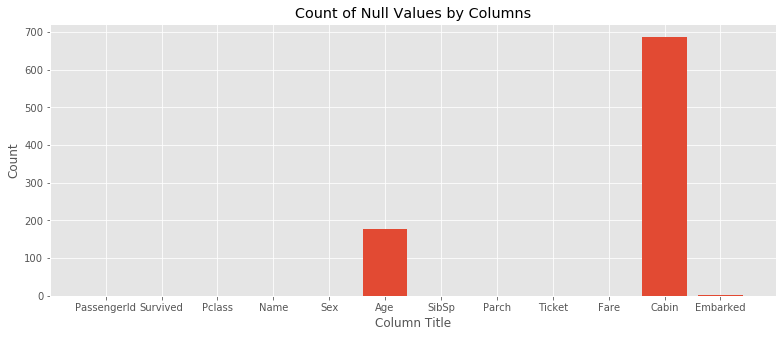

In [9]:
plt.figure(figsize=(13, 5))
plt.bar(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       df.isnull().sum());
plt.xlabel('Column Title')
plt.ylabel('Count')
plt.title('Count of Null Values by Columns');

In [10]:
plt.style.use('ggplot')

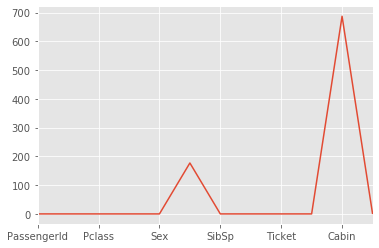

In [11]:
df.isnull().sum().plot()

A few things of note:
- Age has 177 null values
- Cabin has 687 null values (The most in the data set)
- Embarked has 2 null values (least in the data set)

Let's get rid of the Embarked rows where they're null (since we're researching people that were actually on the Titanic!)

In [7]:
#Delete rows (axis = 0), based on the embarked column
df = df.dropna(axis=0, subset=['Embarked'])
#Checking the shape, I want to see the rows go from 891 to 889
df.shape

(889, 12)

Replacing all NaN values in Cabin with '¯\(ツ)/¯'

In [8]:
#Note, the inplace = True because we want it to stay like that in our DataFrame
df['Cabin'].replace(np.nan, '¯\(ツ)/¯', inplace = True)

## Step 3: Feature Extraction!

In [9]:
#Create FamilyCount column based on the sum of SibSp & Parch
df['FamilyCount'] = df['SibSp'] + df['Parch'] + 1

In [10]:
#Create IsReverend column: 1 if they're a preacher, 0 if they're not
def is_reverend(x):
    if 'Rev.' in x:
        return 1
    return 0

df['IsReverend'] = df['Name'].apply(is_reverend)

In [42]:
df[df['IsReverend'] == 1].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Is_female,Is_male
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,1,1,0,0,1,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,1,1,0,0,1,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,2,1,0,0,1,0,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,1,1,0,1,0,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,2,1,0,0,1,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,1,1,0,0,1,0,1


In [11]:
#Create Embarked_C, Embarked_Q, Embarked_S columns using get_dummies
#And adding it to the original DataFrame
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis = 1); df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,2,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,1,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,4,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,1,0,0


In [12]:
#And now doing the same for the Sex column
#Adding it to the original DataFrame as well
pd.get_dummies(df['Sex'], prefix='Is');

In [13]:
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Is')], axis = 1); df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Is_female,Is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,2,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,1,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,1,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,4,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,1,0,0,0,1


## Step 4: Exploratory Analysis - Let's see what's up!

1. What was the survival rate overall?

    - Overall survival rate was 38.2%

In [14]:
# df.groupby('Survived').describe()

df['Survived'].mean()

0.38245219347581555

2. Which gender fared the worst? What was their survival rate?

In [15]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Is_female,Is_male
Sex,,,,,,,,,,,,,,
female,430.932692,0.740385,2.166667,27.745174,0.698718,0.653846,44.252124,2.352564,0.000000,0.233974,0.115385,0.650641,1.0,0.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.665511,0.010399,0.164645,0.071057,0.764298,0.0,1.0


In [16]:
print(f'Survival Rate for women was 74.03% from our data set')
print(f'Survival Rate was the WORST for men, coming in at 18.89% from our data set')

Survival Rate for women was 74.03% from our data set
Survival Rate was the WORST for men, coming in at 18.89% from our data set


3. What was the survival rate for each 'Pclass'?

In [17]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [18]:
print(f'1st Class\'s survival rate was 62.62%')
print(f'2nd Class\'s survival rate was 47.28%')
print(f'3rd Class\'s survival rate was 24.34%')

1st Class's survival rate was 62.62%
2nd Class's survival rate was 47.28%
3rd Class's survival rate was 24.34%


4. Did any reverends survive? How many?
<br><br>
No Reverends survived, they went down with the ship. All of them. See below:

In [19]:
df.groupby('IsReverend')['Survived'].sum()

IsReverend
0    340
1      0
Name: Survived, dtype: int64

5. What is the survival rate for cabins marked ¯\(ツ)/¯?
<br>
Count of cabins: 687 <br>
Sum of cabins: 206 <br>
Survival Rate among the shruggie cabins: 29.99%

In [20]:
df.groupby('Cabin')['Survived'].mean()
# df.groupby('Cabin')['Survived'].count().tail()


Cabin
A10        0.000000
A14        0.000000
A16        1.000000
A19        0.000000
A20        1.000000
             ...   
F38        0.000000
F4         1.000000
G6         0.500000
T          0.000000
¯\(ツ)/¯    0.299854
Name: Survived, Length: 147, dtype: float64

6. What is the survival rate for people whose Age is empty?

In [21]:
age_null = df[df['Age'].isnull()]
age_null.mean()
print(f'The survival rate for those whose Age is empty is 29.38%')

The survival rate for those whose Age is empty is 29.38%


7. What is the survival rate for each port of embarkation?
<br>
C: 93 / 168
<br>
Q: 30 / 77
<br>
S: 217 / 644

In [22]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [23]:
print(f'The survival rate for Cherbourg is 55.35%')
print(f'The survival rate for Queenstown is 38.96%')
print(f'The survival rate for Southampton is 33.69%')

The survival rate for Cherbourg is 55.35%
The survival rate for Queenstown is 38.96%
The survival rate for Southampton is 33.69%


8. What is the survival rate for children (under 12) in each Pclass?

In [24]:
#Separated the dataframe for Age < 12
child_df = df[df['Age'] < 12]
child_df.shape
child_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [25]:
print(f'The survival rate for 1st class children is 75.0%')
print(f'The survival rate for 2nd class children is 100.0%')
print(f'The survival rate for 3rd class children is 40.43%')

The survival rate for 1st class children is 75.0%
The survival rate for 2nd class children is 100.0%
The survival rate for 3rd class children is 40.43%


9. Did the captain of the ship survive? Is he on the list?
<br><br>
The captain of the ship did not survive (Name: Captain Edward John Smith). He is not on the list and required external research to find! There was however a captain on the ship but not the actual captain of the Titanic

10. Of all the people that died, who had the most expensive ticket? How much did it cost?


In [26]:
df['Fare'].max()
#In the above, I found the max was 512.3292, so I sliced that number below
#Got three names!
df.loc[df['Fare'] == 512.3292, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Is_female,Is_male
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,¯\(ツ)/¯,C,1,0,1,0,0,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,0,1,0,0,0,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,0,1,0,0,0,1


11. Does having family on the boat help or hurt your chances of survival?
<br><br>

Based on the percents in the print outputs, if you're in the 2-4 family size, it increases your survival chances. After that, it plummets dramatically, down to 0% for the largest of families on the ship. If you're a family size of 1 (meaning, just you), your odds aren't good. 

In [27]:
df.groupby('FamilyCount')['Survived'].mean()

FamilyCount
1     0.300935
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

## Step 5: Plotting!

#### Couple of points of notes

 - As we can see, women were substantially more likely to survive on the Titanic than men overall (plot 1)
 - The higher class passenger you were, the more likely you were to survive on the Titanic. 3rd class was the lowest percentage, increased with 2nd class, and highest survival among the wealth 1st class (plot 2)
 - Apparently your point of origin/embarkation affected your chances of survival. If you boarded in Cherbourg, you were most likely to survive, and if you boarded in Southampton, you were least likely to survive.
 - If you're in the 2-4 family size, it increases your survival chances. After that, it plummets dramatically, down to 0% for the largest of families on the ship. If you're a family size of 1 (meaning, just you), your odds aren't good. At all
 - Interestingly, when you breakdown the passenger class and then the Sexes in each class, you see that 3rd class is bad for both sexes, even if you're a woman
 - While survival is high for women in 1st and 3rd class, if you were a 1st class man, you stood substantially more chance of surviving than 2nd class and 3rd class men. It's your best hope. 
 - In a similar fashion, if you're a male and you boarded in Cherbourg, you stood a much more likely chance to survive than those who boarded in Queenstown and Southampton

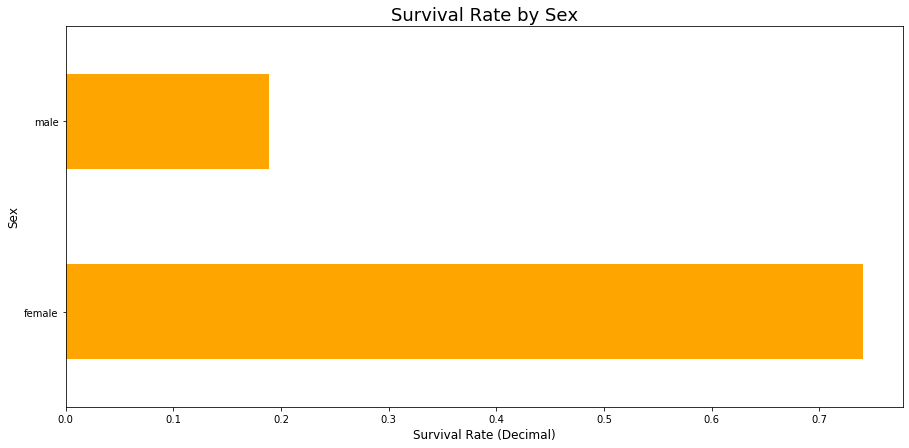

In [28]:
plt.figure(figsize=(15,7))

df.groupby(['Sex']).mean()['Survived'].plot(kind='barh', color='orange')

plt.xlabel('Survival Rate (Decimal)', size=12);
plt.ylabel('Sex', size=12);
plt.title('Survival Rate by Sex', size=18);

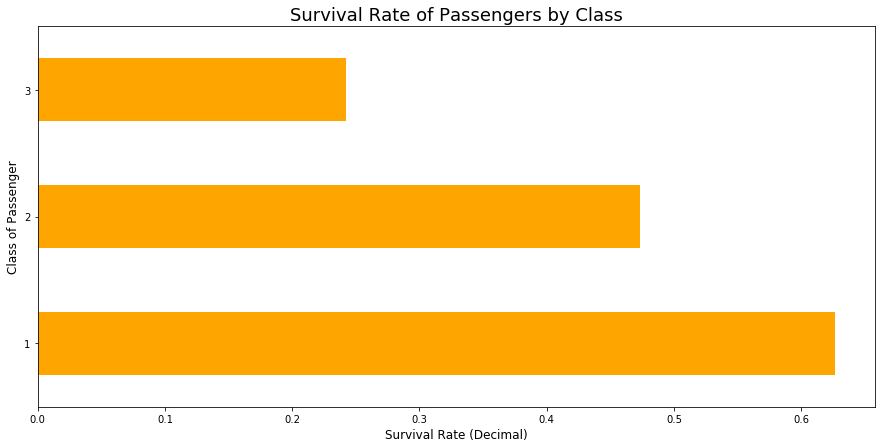

In [29]:
plt.figure(figsize=(15,7))

df.groupby(['Pclass']).mean()['Survived'].plot(kind='barh', color='orange')

plt.xlabel('Survival Rate (Decimal)', size=12);
plt.ylabel('Class of Passenger', size=12);
plt.title('Survival Rate of Passengers by Class', size=18);

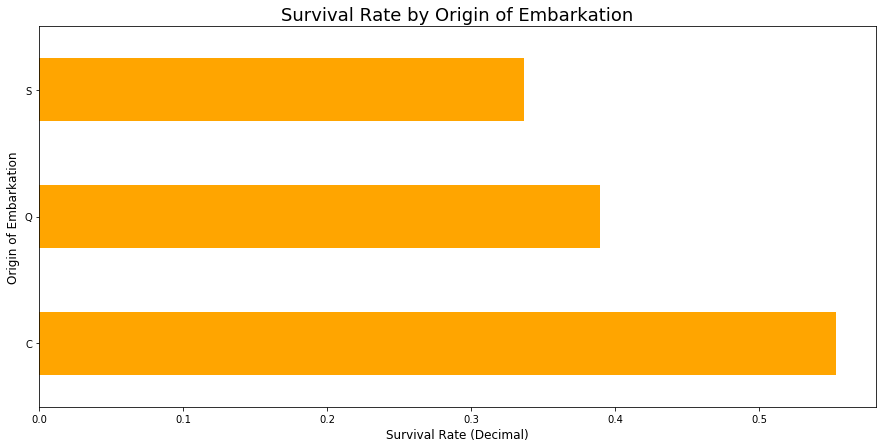

In [30]:
plt.figure(figsize=(15,7))

df.groupby(['Embarked']).mean()['Survived'].plot(kind='barh', color='orange')

plt.xlabel('Survival Rate (Decimal)', size=12);
plt.ylabel('Origin of Embarkation', size=12);
plt.title('Survival Rate by Origin of Embarkation', size=18);

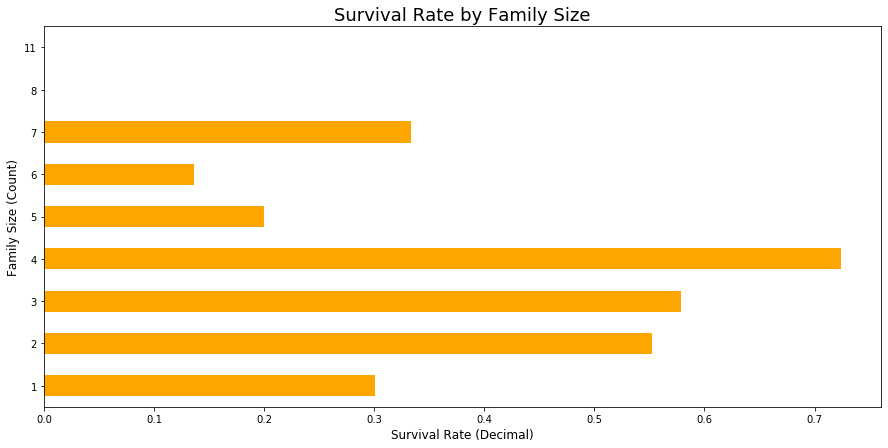

In [31]:
plt.figure(figsize=(15,7))

df.groupby(['FamilyCount']).mean()['Survived'].plot(kind='barh', color='orange')

plt.xlabel('Survival Rate (Decimal)', size=12);
plt.ylabel('Family Size (Count)', size=12);
plt.title('Survival Rate by Family Size', size=18);

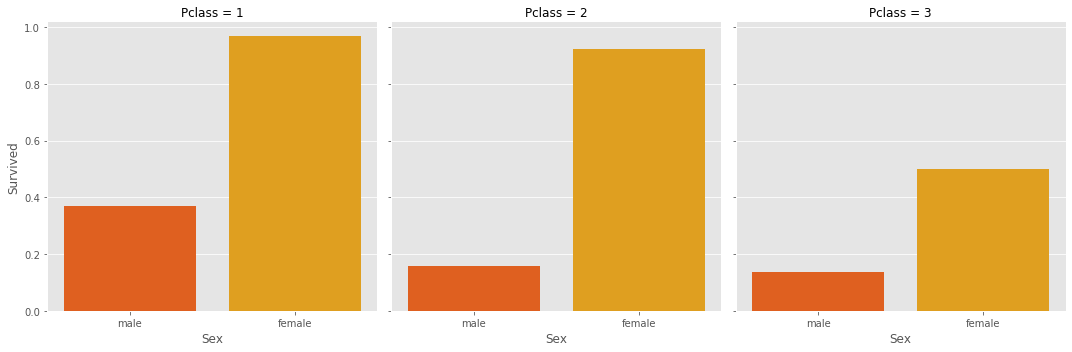

In [14]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df, kind='bar', ci=None, palette='autumn');

# plt.xlabel('Survival Rates of Males/Females by Passenger Class', size=20);


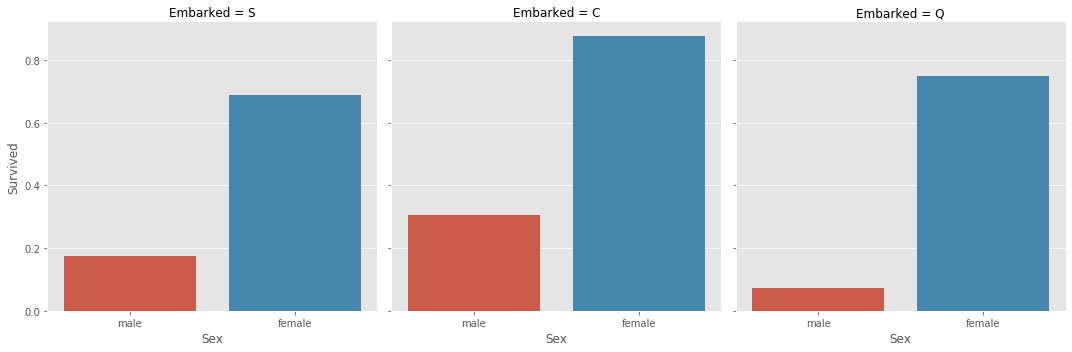

In [15]:
sns.catplot(x='Sex', y='Survived', col='Embarked', data=df, kind='bar', ci=None);

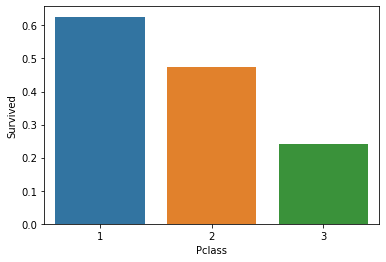

In [45]:
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)

In [ ]:
df[(df['Survived'] == 0) & (df['Pclass'] == 1)]['Age']

C:\Users\Rytas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rytas\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


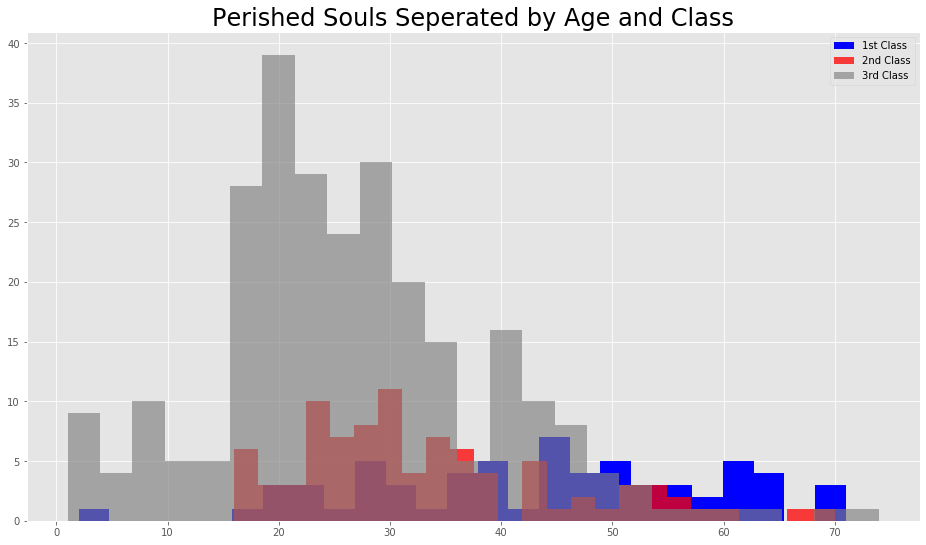

In [16]:
plt.figure(figsize=(16, 9))
plt.hist(df[(df['Survived'] == 0) & (df['Pclass'] == 1)]['Age'], bins = 25, color = 'blue', label = '1st Class')
plt.hist(df[(df['Survived'] == 0) & (df['Pclass'] == 2)]['Age'], bins = 25, color = 'red', alpha = 0.75, label = '2nd Class')
plt.hist(df[(df['Survived'] == 0) & (df['Pclass'] == 3)]['Age'], bins = 25, color = 'grey', alpha = 0.65, label = '3rd Class')
plt.title('Perished Souls Seperated by Age and Class', fontsize=24)
plt.legend();